In [1]:
import pandas as pd

# Load data
df = pd.read_csv('data/seoul_bike_data.csv', encoding='latin1')

# Show first few rows
df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [2]:
# Check data types and nulls
df.info()

# Check missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [3]:
df.describe()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [6]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)


In [7]:
df = df[df['functioning_day'] == 'Yes']
df.drop('functioning_day', axis=1, inplace=True)


In [8]:
df['holiday'] = df['holiday'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, columns=['seasons'], drop_first=True)


In [9]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday


In [11]:
# Check the column names in the dataset
print(df.columns)



Index(['date', 'rented_bike_count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(°c)',
       'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)', 'holiday',
       'seasons_Spring', 'seasons_Summer', 'seasons_Winter', 'day', 'month',
       'weekday'],
      dtype='object')


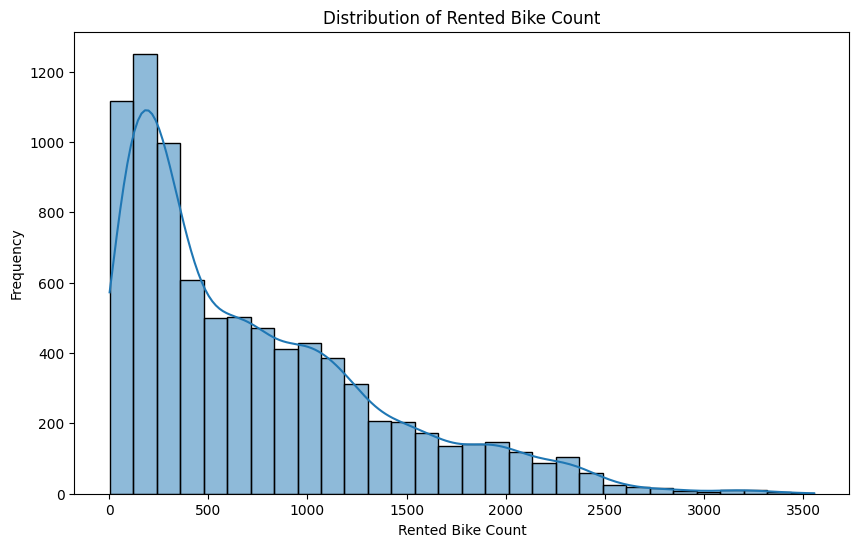

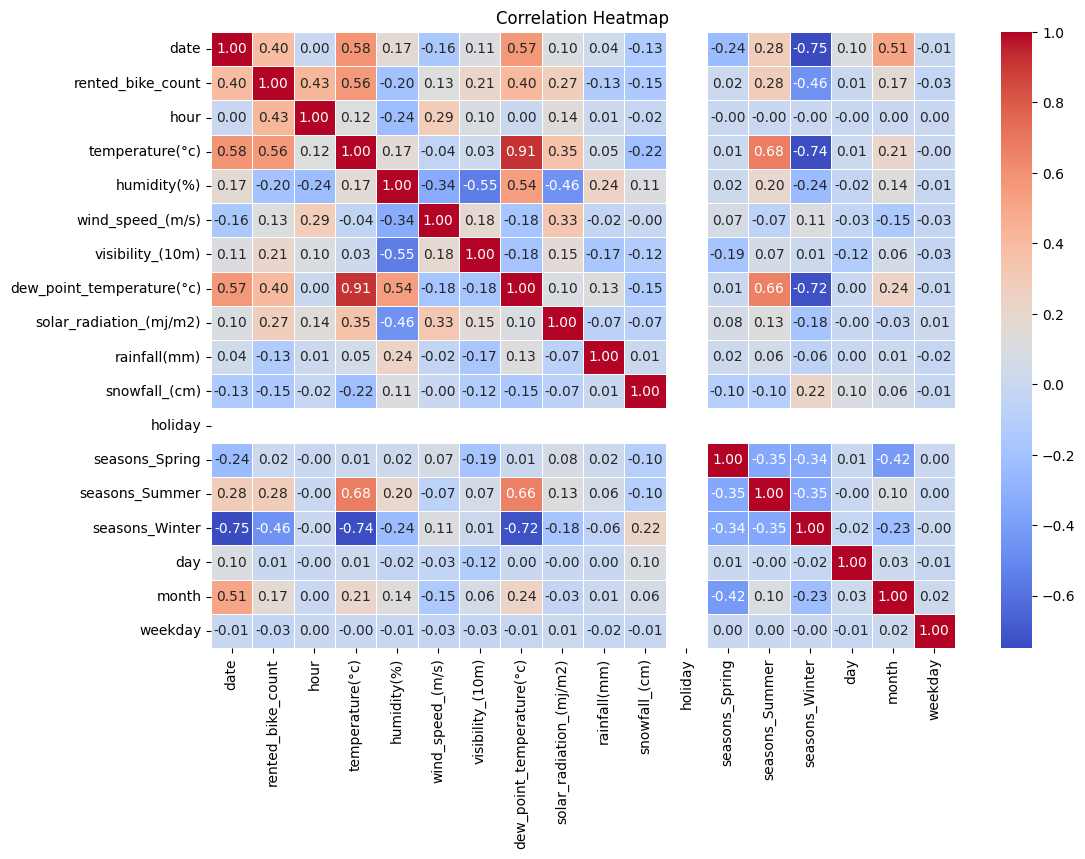

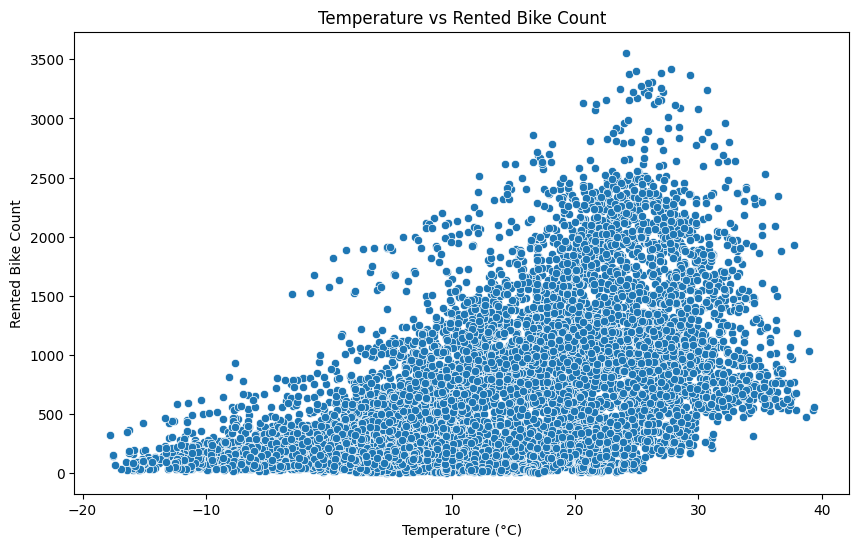

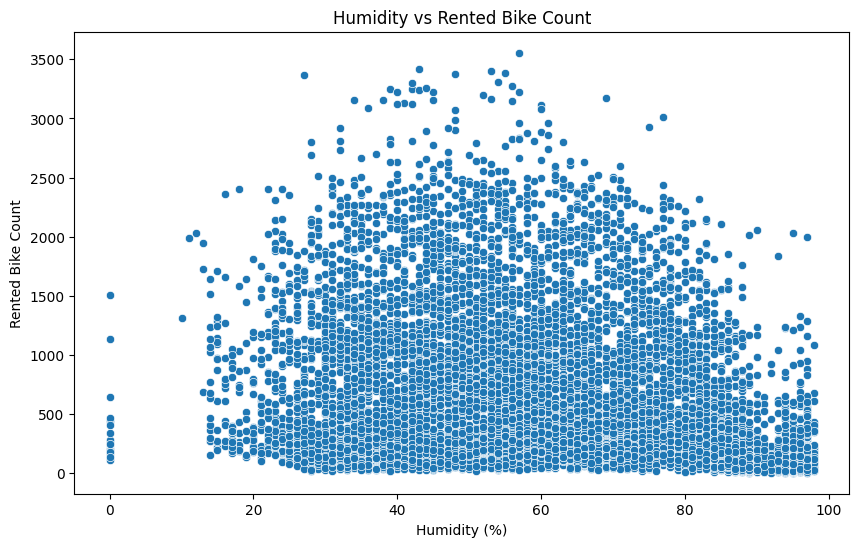

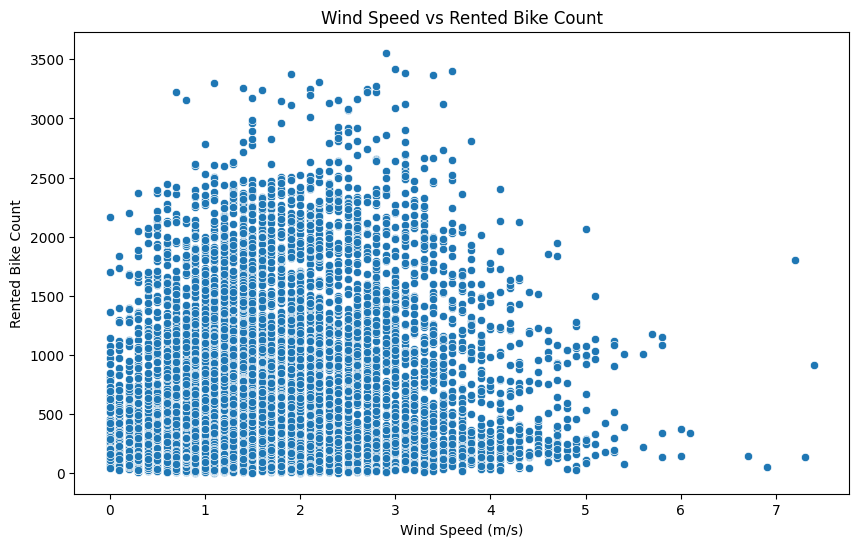

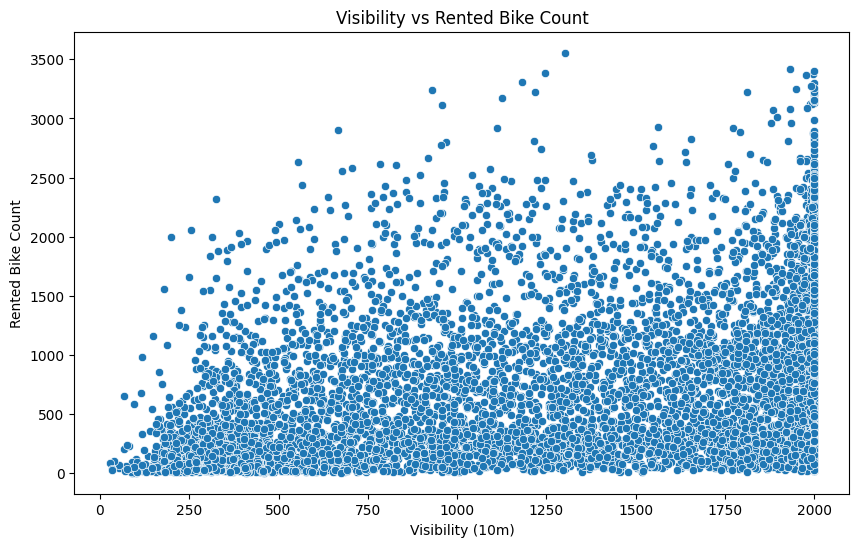

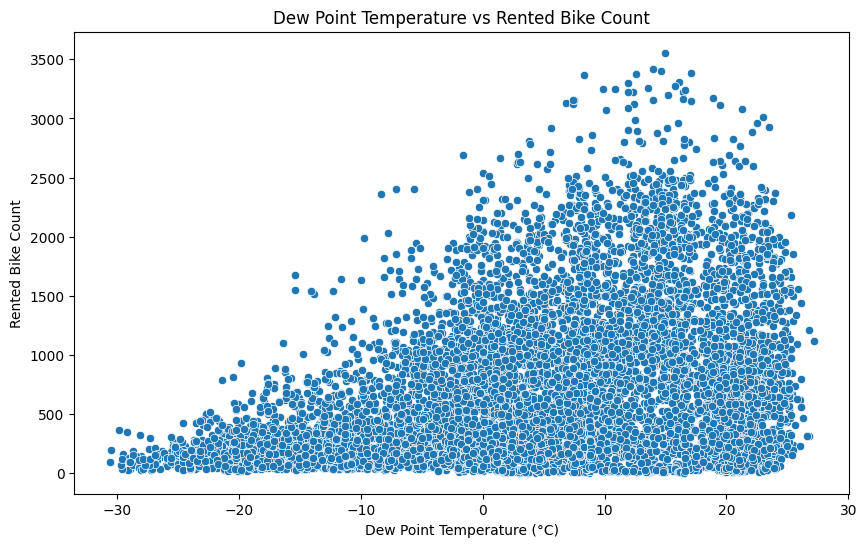

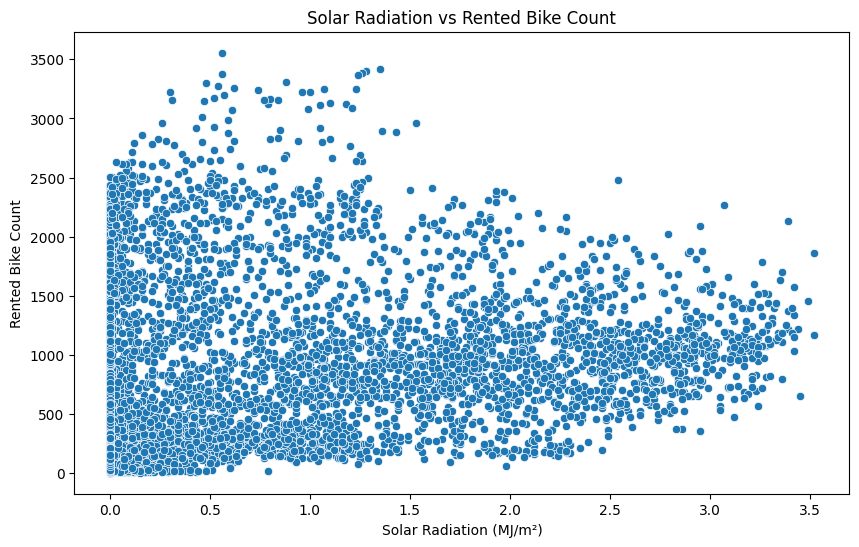

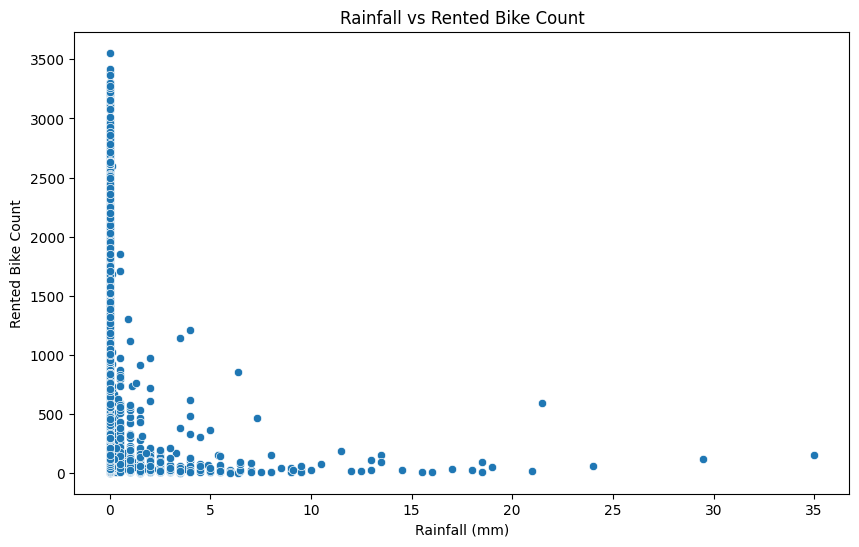

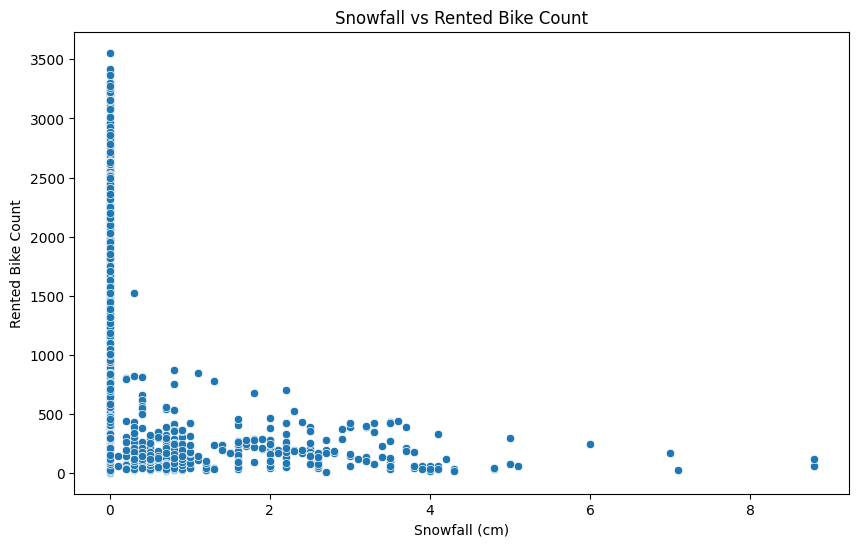

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of rented bike count
plt.figure(figsize=(10, 6))
sns.histplot(df['rented_bike_count'], kde=True, bins=30)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for the dataset
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Plotting temperature vs rented bike count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature(°c)', y='rented_bike_count', data=df)
plt.title('Temperature vs Rented Bike Count')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()

# Plotting humidity vs rented bike count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity(%)', y='rented_bike_count', data=df)
plt.title('Humidity vs Rented Bike Count')
plt.xlabel('Humidity (%)')
plt.ylabel('Rented Bike Count')
plt.show()

# Plotting wind speed vs rented bike count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed_(m/s)', y='rented_bike_count', data=df)
plt.title('Wind Speed vs Rented Bike Count')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.show()

# Plotting visibility vs rented bike count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visibility_(10m)', y='rented_bike_count', data=df)
plt.title('Visibility vs Rented Bike Count')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.show()

# Plotting dew point temperature vs rented bike count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dew_point_temperature(°c)', y='rented_bike_count', data=df)
plt.title('Dew Point Temperature vs Rented Bike Count')
plt.xlabel('Dew Point Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()

# Plotting solar radiation vs rented bike count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='solar_radiation_(mj/m2)', y='rented_bike_count', data=df)
plt.title('Solar Radiation vs Rented Bike Count')
plt.xlabel('Solar Radiation (MJ/m²)')
plt.ylabel('Rented Bike Count')
plt.show()

# Plotting rainfall vs rented bike count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rainfall(mm)', y='rented_bike_count', data=df)
plt.title('Rainfall vs Rented Bike Count')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Rented Bike Count')
plt.show()

# Plotting snowfall vs rented bike count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='snowfall_(cm)', y='rented_bike_count', data=df)
plt.title('Snowfall vs Rented Bike Count')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')
plt.show()


In [17]:
# Extracting date-related features
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [18]:
# One-hot encoding categorical variables
df = pd.get_dummies(df, columns=['seasons_Spring', 'seasons_Summer', 'seasons_Winter', 'holiday'], drop_first=True)


In [19]:
# Dropping the original 'date' column
df.drop(columns=['date'], inplace=True)


In [20]:
from sklearn.preprocessing import StandardScaler

# Scaling the numerical features
scaler = StandardScaler()
numerical_features = ['temperature(°c)', 'humidity(%)', 'wind_speed_(m/s)', 'visibility_(10m)',
                      'dew_point_temperature(°c)', 'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)',
                      'hour', 'day', 'month', 'weekday']

df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [21]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target variable (y)
X = df.drop(columns=['rented_bike_count'])
y = df['rented_bike_count']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import joblib

# List out the numeric columns you scaled previously:
numeric_features = [
    'temperature(°c)', 'humidity(%)', 'wind_speed_(m/s)', 'visibility_(10m)',
    'dew_point_temperature(°c)', 'solar_radiation_(mj/m2)',
    'rainfall(mm)', 'snowfall_(cm)', 'hour', 'day', 'month', 'weekday'
]

# Rebuild the preprocessor: scale only those, pass everything else through
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
)

# Fit on your training data
preprocessor.fit(X_train)

# Save it
joblib.dump(preprocessor, 'final_preprocessor.pkl')
# And your model if you haven’t already
joblib.dump(best_model,     'final_xgboost_model.pkl')


['final_xgboost_model.pkl']

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initializing the model
lr_model = LinearRegression()

# Training the model
lr_model.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluating the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Model - MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")


Linear Regression Model - MSE: 174406.7435, R²: 0.5557


In [23]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model - MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")


Random Forest Model - MSE: 32848.0479, R²: 0.9163


In [24]:
import xgboost as xgb

# Initializing the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Training the model
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model - MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")


XGBoost Model - MSE: 28724.2812, R²: 0.9268


In [25]:
# Comparing model performance
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mse_values = [mse_lr, mse_rf, mse_xgb]
r2_values = [r2_lr, r2_rf, r2_xgb]

comparison_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'R²': r2_values
})

print(comparison_df)


               Model            MSE        R²
0  Linear Regression  174406.743491  0.555749
1      Random Forest   32848.047869  0.916329
2            XGBoost   28724.281250  0.926833


In [26]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the XGBoost model
xgb = XGBRegressor(objective='reg:squarederror')

# Hyperparameter grid to search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Use the best model found by RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized XGBoost Model - MSE: {mse}, R²: {r2}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best Score: 0.9468541383743286
Optimized XGBoost Model - MSE: 24714.193359375, R²: 0.9370477795600891


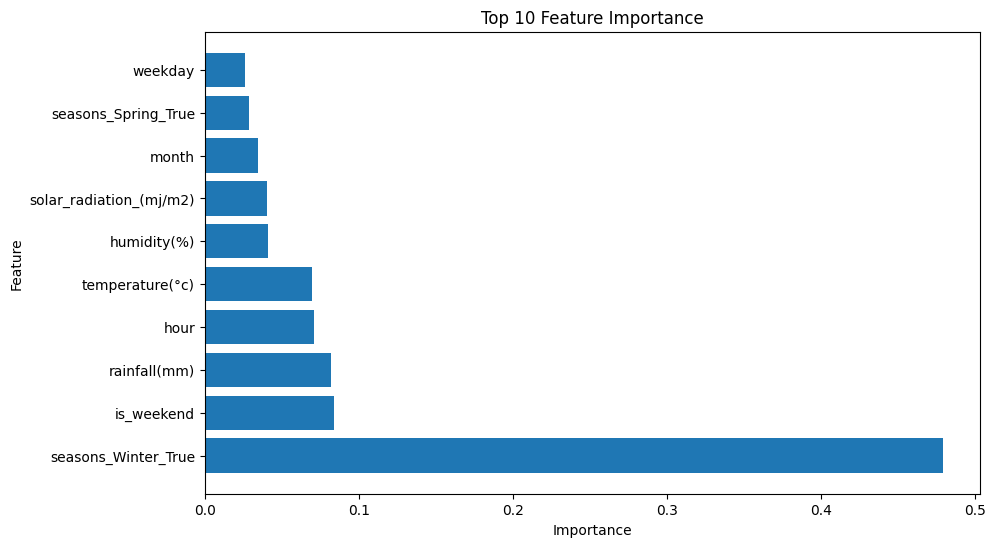

In [28]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd

# Get the feature importance
importances = best_model.feature_importances_

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


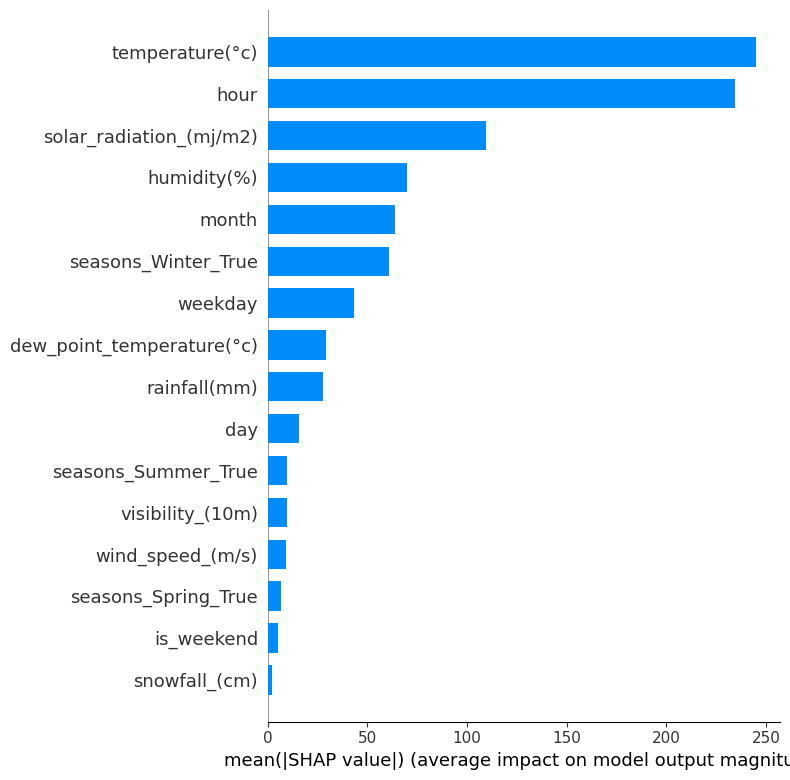

In [30]:
import shap

# Create TreeExplainer for XGBoost
explainer = shap.Explainer(best_model)

# Compute SHAP values
shap_values = explainer(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [35]:
import joblib
import pandas as pd

# 1) Load
preprocessor = joblib.load('final_preprocessor.pkl')
model        = joblib.load('final_xgboost_model.pkl')

# 2) Pick a few raw test rows
raw_X_test = X_test.iloc[:5]   # unscaled / unencoded

# 3) Transform & Predict
X_transformed = preprocessor.transform(raw_X_test)
preds         = model.predict(X_transformed)

print("Raw inputs:\n", raw_X_test)
print("Predictions:\n", preds)


Raw inputs:
           hour  temperature(°c)  humidity(%)  wind_speed_(m/s)  \
5993  0.793726         1.886119    -0.690659          0.651812   
5340  0.071234         1.266472     0.725106          0.361738   
5951  1.660716         1.324305     1.018023         -0.411791   
879   0.504729        -0.865115    -1.520590          0.458429   
6909  1.371719         0.985565     0.139272         -0.121718   

      visibility_(10m)  dew_point_temperature(°c)  solar_radiation_(mj/m2)  \
5993          0.699698                   1.318193                 1.292490   
5340         -0.177128                   1.416368                 0.348001   
5951          0.082307                   1.567407                -0.654079   
879           0.727612                  -1.415612                 0.405592   
6909          0.929577                   0.955699                -0.654079   

      rainfall(mm)  snowfall_(cm)       day     month   weekday  is_weekend  \
5993     -0.132495      -0.174951 -1.00840

In [36]:
from sklearn.pipeline import Pipeline
import joblib

# 1) Build the full pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),    # your ColumnTransformer
    ('xgb_model',     best_model)      # your tuned XGBoost
])

# 2) Save it
joblib.dump(full_pipeline, 'bike_rental_full_pipeline.pkl')


['bike_rental_full_pipeline.pkl']